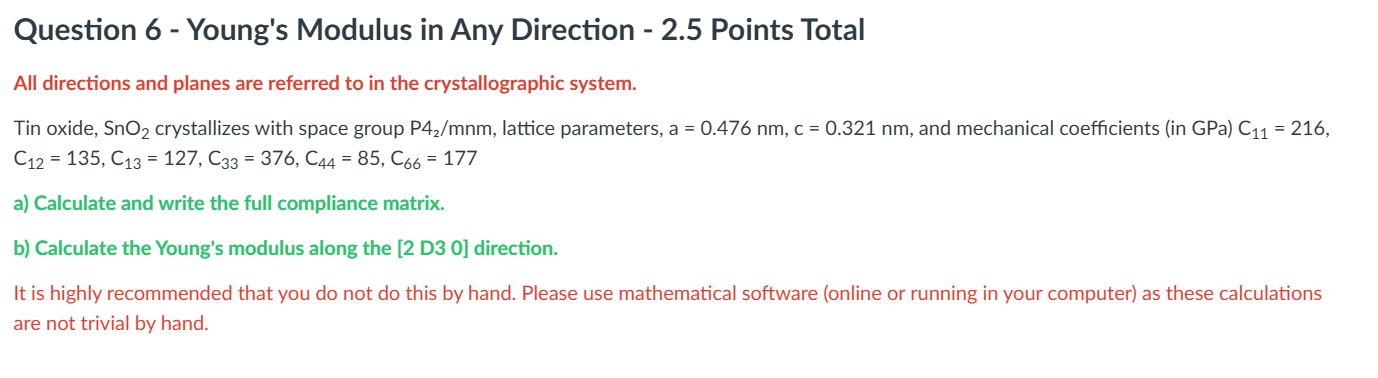

In [2]:
#trying to find the young's modulus in the given direction for the tetragonal crystal system,thus generalized solution

#UFID: 8 0 7 7 3 6 5 3 D1 D2 D3 D4 D5 D6 D7 D8

import numpy as np
import math

x = input("Give your 8 digit UFID:\n")

if len(x)!=8 or not x.isdigit():
    raise ValueError

D= []
for d in x:
    D.append(int(d))

#print(D)

D1 = D[0]
D2 = D[1]
D3 = D[2]
D4 = D[3]
D5 = D[4]
D6 = D[5]
D7 = D[6]
D8 = D[7]

# Stiffness matrix values for tetragonal material (in Pa)
c11 = c22 = 216*(10**9)
c12 = c21= 135*(10**9)
c13 = c23 = c31 =c32= 127*(10**9)
c33 = 376*(10**9)
c44 = c55 = 85*(10**9)
c66 = 177*(10**9)


# Define the stiffness matrix for the  tetragonal crystal system
stiffness_Matrix = np.array([
    [c11, c12, c13, 0, 0, 0],
    [c12, c22, c13, 0, 0, 0], 
    [c13, c13, c33, 0, 0, 0],
    [0, 0, 0, c44, 0, 0],
    [0, 0, 0, 0, c55, 0],
    [0, 0, 0, 0, 0, c66]
])

# Print the stiffness matrix

print("The resultant stiffness matrix for the given tetragonal in (Pa) is:")
print("[")
for row in stiffness_Matrix:
    print("  [" + " ".join(f"{val: .3e}" for val in row) + "],")
print("]")

# Calculate the compliance matrix by inverting the stiffness matrix
compliance_matrix = np.linalg.inv(stiffness_Matrix)

# Print the compliance matrix

print("The resultant compliance matrix for the given tetragonal in (Pa^-1) is:")
print("[")
for row in compliance_matrix:
    print("  [" + " ".join(f"{val: .3e}" for val in row) + "],")
print("]")

# Basis vectors
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])
w = np.array([0, 0, 1])

# Direction vector
n_vec = np.array([2,D3,0])

# Metric tensor (example values, modify as per your problem's lattice parameters)
# lattice parameters
a=b= 0.476 # in nanometers
c = 0.321 
#agnles
alpha = 90
beta = 90
gamma = 90
m_t = np.array([[a**2, a*b*math.cos(math.radians(gamma)),a*c*math.cos(math.radians(beta))], 
                [b*a*math.cos(math.radians(gamma)),b**2,b*c*math.cos(math.radians(alpha))], 
                [c*a*math.cos(math.radians(beta)),c*b*math.cos(math.radians(alpha)) ,c**2]])

# Define the rotation_element function to calculate the direction cosine
def rotation_element(vec1, m_t, vec2):
    # Metric-based dot product calculation
    numerator = np.dot(vec1.T, np.dot(m_t, vec2))
    norm_1 = math.sqrt(np.dot(vec1, np.dot(m_t, vec1.T)))  # Metric norm of vec1
    norm_2 = math.sqrt(np.dot(vec2, np.dot(m_t, vec2.T)))  # Metric norm of vec2
    return numerator / (norm_1 * norm_2)

# Calculate direction cosines a11, a12, and a13 for [233] with respect to u, v, w
a11 = rotation_element(u, m_t, n_vec)  # Direction cosine with the x-axis
a12 = rotation_element(v, m_t, n_vec)  # Direction cosine with the y-axis
a13 = rotation_element(w, m_t, n_vec)  # Direction cosine with the z-axis

print(f"Direction cosines: a11 = {a11}, a12 = {a12}, a13 = {a13}")

#Extract relevant values from the compliance matrix
s11 = compliance_matrix[0, 0]
s12 = compliance_matrix[0, 1]
s13 = compliance_matrix[0, 2]
s14 = compliance_matrix[0, 3]
s15 = compliance_matrix[0, 4]
s16 = compliance_matrix[0, 5]
#second row
s22 = compliance_matrix[1, 1]
s23 = compliance_matrix[1, 2]
s24 = compliance_matrix[1, 3]
s25 = compliance_matrix[1, 4]
s26 = compliance_matrix[1, 5]
#third row
s33 = compliance_matrix[2, 2]
s34 = compliance_matrix[2, 3]
s35 = compliance_matrix[2, 4]
s36 = compliance_matrix[2, 5]
#fourth row
s44 = compliance_matrix[3, 3]
s45 = compliance_matrix[3, 4]
s46 = compliance_matrix[3, 5]
#fifth row
s55 = compliance_matrix[4, 4]
s56 = compliance_matrix[4, 5]
#sixth row
s66 = compliance_matrix[5, 5]

#Tetragonal classes 4,4bar,422, 4/mmmm
#E = 1/(((a11**4)+(a12**4))*s11 + (a13**4)*s33 + (a11**2)*(a12**2)*(2*s12 + s66)) + (a13**2)*(1-(a13**2))*(2*s13+s44)

#Young's modulus calculation for Tetragonal classes 4,4bar,422, 4/mmmm
E = 1 /((((a11**4)+(a12**4))*s11)
        +((a13**4)*s33)
        +(((a11**2)*(a12**2))*(2*s12+s66))
        +(((a13**2)*(1-(a13**2)))*(2*s13+s44)))
print(f"The Young's modulus for the given system for {n_vec}= [2 D3 0] direction is:\n",E/1e9,"GPa")
#Now, only thing that we need to get the young's modulus for the given system is to get the following things:
    # We need to find the direction cosines for the relative direction using the given direction
    # values of different compliance components can be either directly given or it can be directly calculated by inverting the given compliance matrix.

The resultant stiffness matrix for the given tetragonal in (Pa) is:
[
  [ 2.160e+11  1.350e+11  1.270e+11  0.000e+00  0.000e+00  0.000e+00],
  [ 1.350e+11  2.160e+11  1.270e+11  0.000e+00  0.000e+00  0.000e+00],
  [ 1.270e+11  1.270e+11  3.760e+11  0.000e+00  0.000e+00  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  8.500e+10  0.000e+00  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  8.500e+10  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.770e+11],
]
The resultant compliance matrix for the given tetragonal in (Pa^-1) is:
[
  [ 8.058e-12 -4.288e-12 -1.274e-12  0.000e+00  0.000e+00  0.000e+00],
  [-4.288e-12  8.058e-12 -1.274e-12  0.000e+00  0.000e+00  0.000e+00],
  [-1.274e-12 -1.274e-12  3.520e-12  0.000e+00  0.000e+00  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  1.176e-11  0.000e+00  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.176e-11  0.000e+00],
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  5.650e-12],
]


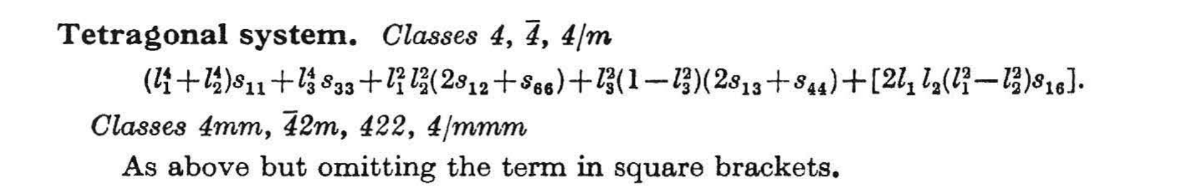


The equation used to find out the young's modulus in the Tetragonal system is taken from the J. F. Nye - Physical Properties of Crystals_ Their Representation by Tensors and Matrices -Oxford University Press

J. F. Nye - Physical Properties of Crystals_ Their Representation by Tensors and Matrices -Oxford University Press 